In [1]:
#ref : Higham(2001)

import numpy as np
import matplotlib.pyplot as plt
from math import *
from seaborn import *
plt.style.use('classic')
%matplotlib inline

In [2]:
r=np.random.RandomState(100)#exposes a number of methods for generating random numbers drawn from a variety of probability distributions
λ= 2; μ= 1; Xzero= 1;
T= 1; N=2**9; dt=float(T)/N; M= 1000;  #parameters
'''
λ
μ
'''

'\nλ\nμ\n'

In [24]:
Xerr=np.zeros((M,5))

for s in range(M):
    dW=np.sqrt(dt)*np.random.randn(1,N) #brownian increment
    W=np.cumsum(dW) #Return the cumulative sum of the elements along a given axis.
    Xtrue= Xzero*np.exp((λ-0.5*μ**2)*T+μ*W[-1]) 
    #http://mathesaurus.sourceforge.net/matlab-numpy.html
    #matlab version w(end) -> to pyton w[-1] : return the last element
    for p in range(5):
        R=2**p; 
        Dt=R*dt; 
        L=N//R;
        Xem=Xzero;
        for j in range(1,L+1):
            Winc = np.sum(dW[(R*(j-1)+R):(R*j+ R)]);
         
            Xem += Dt*λ*Xem + μ*Xem*Winc
        Xerr[s,p]=np.abs(Xtrue-Xem)

print(Xerr)

[[ 5.40771158  5.37923862  5.32305782  5.21366418  5.00605478]
 [13.29284085 13.3213138  13.37749461 13.48688825 13.69449764]
 [18.69693214 18.7254051  18.7815859  18.89097954 19.09858894]
 ...
 [ 3.2161965   3.18772354  3.13154274  3.0221491   2.8145397 ]
 [ 6.14915186  6.12067891  6.0644981   5.95510446  5.74749507]
 [ 4.43058403  4.45905698  4.51523779  4.62463143  4.83224082]]


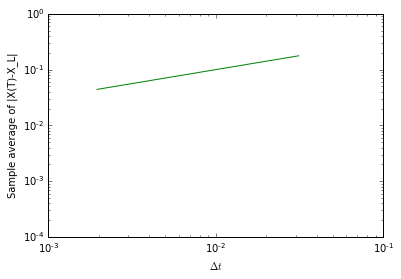

In [14]:
Dtvals=dt*(np.power(2,range(5)))
plt.loglog(Dtvals, np.mean(Xerr,0))
plt.loglog(Dtvals, np.power(Dtvals, 0.5))
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.xlabel('$\Delta t$'); plt.ylabel('Sample average of |X(T)-X_L|');

In [17]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import accuracy_score
#https://scikit-learn.org/stable/modules/model_evaluation.html